# Hiring Demographics

An analysis of gendered hiring patterns. Look at the average time between getting a PhD and getting hired into a faculty position. 

**Research Question**: Are women hired more quickly than men? Given the recent push towards increased diversity, women may be hired at a faster rate out of graduate school.


**Sample**: Use the listings on the Astrophysics Rumor Mill as a representative sample of people that have been hired over the past few years. Exclusively use rumors with confirmed names. While this an incomplete list of people hired over the past few years, it is likely representative. Use 2010-2011 through 2016-2017 years. PhD year for each person on the list was determined from a google search (usually listed in a CV, or on the faculty webpage). For the year that the person was hired, use the latter year of the rumor mill (ie. for names on the 2010-2011, the year hired is 2011). Do not consider when they actually started the faculty job; the focus is on the hiring process, and in that case the year someone was hired is more important. 

When googling for the PhD year, record the gender of the astronomer. This assumes a binary gender, and evaluates gender strictly based on how they present in an available photo. This marginalizes non-binary gender individuals... It is a simplifying assumption.


I exclude people who got a PhD before 2000. Most of the people in this range previously worked at a national lab (e.g. JPL) before being hired into a faculty position. Given the hypothesis, this is a reasonable assumption.

This leaves a total sample size of 245 people, 157 men, 88 women. 

In [13]:
%run plot_demo

 
Mean time to hiring: 4.90+-0.31


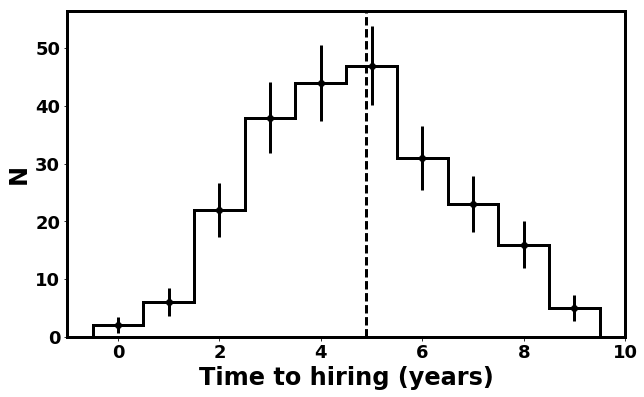

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,6)
plot_demo(full=True)

This (and subsequent figures) show the number of people hired as a function of the time between when they received their PhD and when they were hired. Over the entire distribution, the mean time to hiring is 4.90$\pm$0.31

 
Time to faculty, Men: 5.31+-0.42
Time to faculty, Female: 4.16+-0.44 
Prob: 0.034


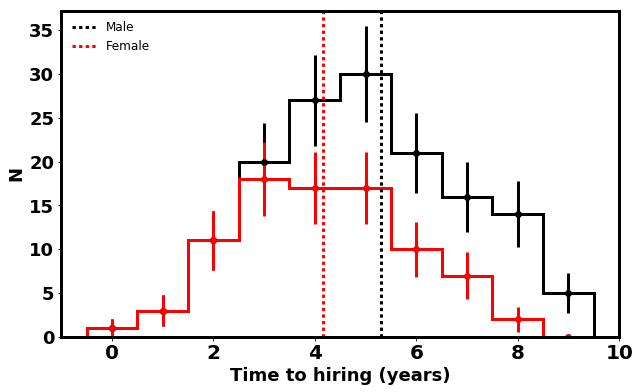

In [5]:
plot_demo()

There is a significant difference in the gendered distributions. Women are hired on average 4.2$\pm$0.4 years out of graduate school, while men are hired on average 5.3$\pm$0.4 years out of grad school. A KS test indicates a significant difference in these distribution at p<0.05 (p=0.034). Interestingly, the number of male and female astronomers hired within the first 2 years of graduate school is identical, and is not significantly difference until the fourth year out of graduate school

## R1 vs non-R1:

Small liberal arts colleges are very different from large universities, and it may be that their hiring decisions are one of the differences. We can broadly split the hiring institutions into R1 (doctoral-granting, highest research activity) and non-R1 schools. Finer slicing is limited by small number statistics.

Overall, 182 astronomers were hired into R1 institutions, while 63 were hired into non-R1 institutions. Of the R1 hires, 68$\pm$6% (124/182) were male, while 52$\pm$19% (33/63) of non-R1 hires were male.

Comparing the hiring time, regardless of gender, we find no significant difference between R1 and non-R1 schools (shown below).

 
Time to faculty, R1: 4.94+-0.37
Time to faculty, non-R1: 4.78+-0.60 
Prob: 0.840


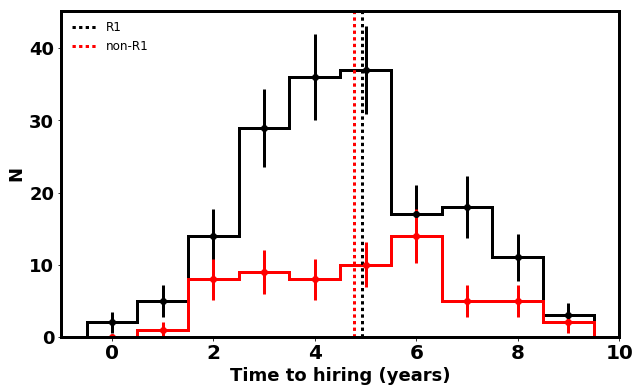

In [9]:
plot_cc()

We can split these distributions based on gender, although these results (shown below) tend to suffer from small number statistics, especially for the non-R1 distribution.

 
Time to faculty, male R1: 5.31+-0.48
Time to faculty, female R1: 4.14+-0.54 
Prob: 0.033
 
Time to faculty, male non-R1: 5.30+-0.92
Time to faculty, female non-R1: 4.20+-0.77 
Prob: 0.432


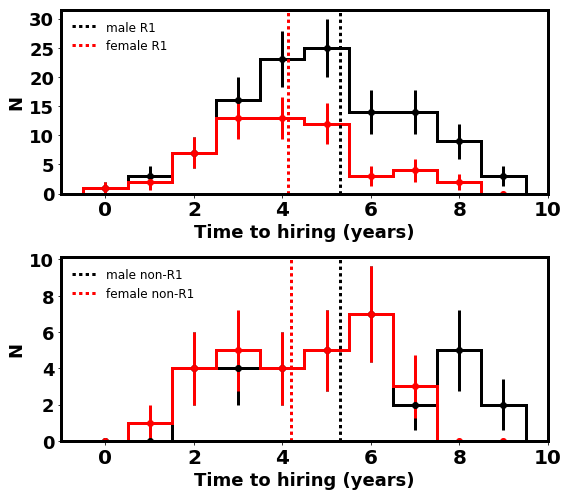

In [12]:
plt.rcParams['figure.figsize']=(8,7)
plot_cc(full=False)
plt.tight_layout()

The R1 schools show a similar distribution, with a significant gender difference, as the full distribution. This is not surprising given that the R1 statistics make up the majority of the full distribution. The non-R1 schools do not show any evidence for a difference between male and female hires, except for 8-10 years post-phD, although it suffers from small number statistics.

## Models:

There are multiple possible explanations for why the genedered distributions could differ. We examine a number of different scenarios using hiring model, with variations based on the different scenarios. The basic model consists of N$_{phd}$ people added to the labor pool each year, and each year N$_{hire}$ are randomly selected from the full labor market and 'hired' into a faculty position. The people that are 'hired' are removed from the labor pool, and the model proceeds to the next year, with another N$_{phd}$ astronomers added to the labor pool and another N$_{hire}$ removed from the labor pool. Whenever someone is 'hired', the year that they were hired, along with the year they got their PhD, is recorded. The labor pool is split between male and female astronomers, depending on the specified fraction of women. Unless otherwise specified we assume that 30% of astronomers (specifically those getting a PhD and entering the tenure-track faculty market) are women.

To reproduce the non-uniform hiring-time distribution we assume that the probability of being hired depends on the time since the astronomer received their phd (p$_{hire}$(t$_{phd}$)). For t$_{phd}$>10 years p is set to zero, while the probabilities for t$_{phd}$<10 are manually adjusted. In general the manual adjustement is done to reproduce the hiring time distribution for male astronomers, and the specifics of the model are adjusted to (attempt to) reproduce the female distribution. Since these models are meant to be illustrative of different scenarios, we do not e.g. perform a likelihood maximization to determine the best fit model parameters, but simply choose parameters that can reasonably reproduce the parameters. 

The labor pool is populated starting in 1980 and running until 2018 (the last year in which people are hired). The hiring begins in 1990, allowing enough time for the labor market to become fully populated. As with the data, we only consider people that were hired after 2010 (2011-2018). The model is started well before this date to ensure that it has reached a steady state before being compared to the data. 

To avoid large statistical noise in any individual trial, we use large values for N$_{phd}$ and N$_{hire}$ (N$_{phd}$=30000, N$_{hire}$=10000). While this is much larger than the actual pool of astronomers it does preserve the ratio of PhDs produced each year to tenure-track faculty openings. The API (2014) reports ~150 PhDs awarded from 2007 to 2012, while in the Astrophysics Rumor Mill there are roughly 50 tenure-track faculty positions listed each year. 


Below we demonstrate a basic model that reproduces the full distribution of hiring times. Note that the $success$ array contains the relative probabilities, but not the absolute probabilities, of being hired a given year after receiving a PhD. The absolute probabilities can be obtained by dividing each entry by the sum total of all of the entries (the code does this normalization before randomly selected people to be hired). Here, instead of the total number of people hired per year, we show the fraction of astronomers hired per year in order to directly compare the data (shown in black) with the model (shown in red). The mean hiring time for the data and model are shown by the black and dashed red lines respectively. 

 
Mean time to hiring: 4.90+-0.31
 
Mean time to hiring (model): 4.70


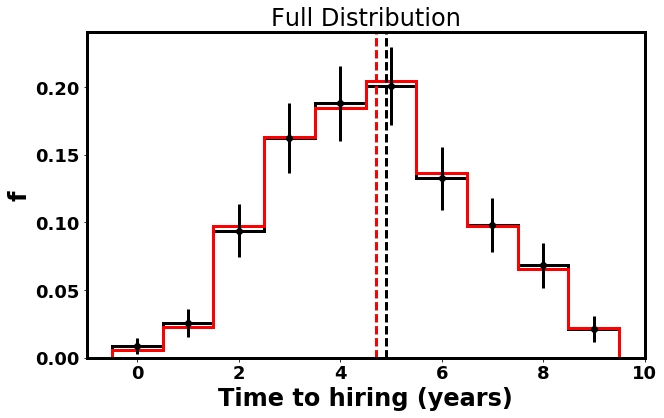

In [14]:
plt.rcParams['figure.figsize']=(10,6)
basic_model(success=[.01,.04,.18,.33,.43,.56,.44,.36,.27,.1])
plt.title('Full Distribution',fontsize=24)

 
Mean time to hiring: 5.31+-0.42
 
Mean time to hiring (model): 4.93


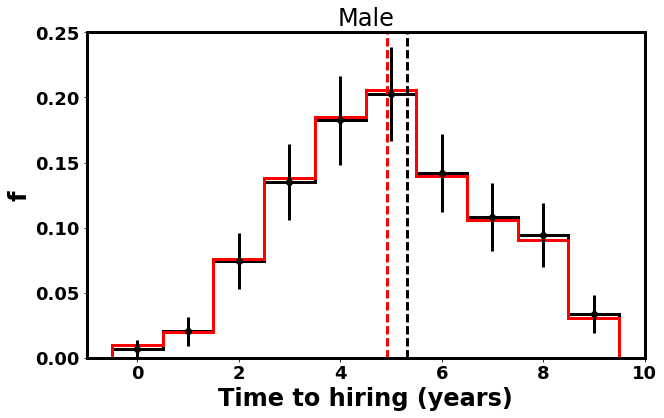

In [15]:
basic_model(success=[.02,.04,.16,.31,.47,.61,.49,.43,.41,.15],male_only=True)
plt.title('Male',fontsize=24)

 
Mean time to hiring: 4.16+-0.44
 
Mean time to hiring (model): 4.12


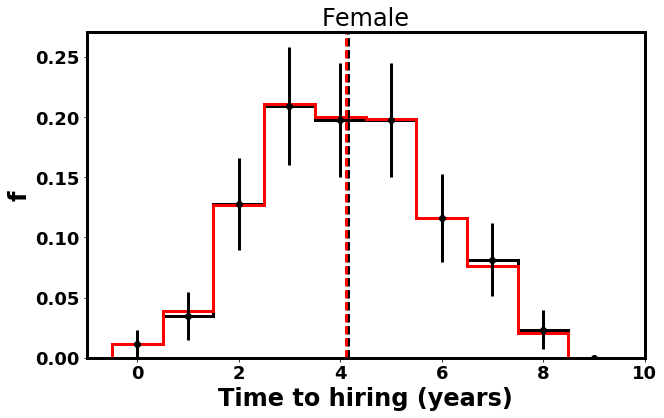

In [16]:
basic_model(success=[.02,.07,.24,.45,.5,.6,.42,.31,.09,.00],female_only=True)
plt.title('Female',fontsize=24)

## Gendered Models

We next turn to explaining the difference in the distributions between men and women. We consider a number of different methods to bias the distributions:
- Increase in the number of women with time.
- A higher probability of a female astronomer being hired than a male astronomer.  
- Women leaving the labor pool more quickly than men.

Our metrics for evaluating the feasability of a model are the ability to match the distributions of hiring times for female astronomers, as well as the survival statistics from Hughes et al. 2014. In the survival statistics analysis Hughes et al. compare the fraction of female graduate students in 2003 to the fraction of female assistant professors in 2013. Assuming no attrition of women from the labor market, these two fractions would be the same, but instead there is a significant decrease from 30$\pm$2% in 2003 to 26$\pm$4% in 2013. To calculate the number of female PhD students in 2003, we consider all entries that received a PhD between 2003 and 2010 and calculate the fraction of women within this subset. Assuming a typical PhD length of 7 years, this range of times encompases first year and recently graduated students within the model. To calculate the fraction of female assistant professors in 2013, we calculate the fraction of women among astronomers hired between 2007 and 2013. This assumes a typical time to tenure (and promotion from assistant to associate faculty) of six years. 

As mentioned above, we do not employ any statistically robust fitting method to constrain the model parameters. We adjust the relative probabilities of being hired to reproduce the hiring time distribution for male astronomers, and then adjust the specific model parameters to best reproduce the female hiring time distribution. 

### Model 1: Changing Demographics 

The first model we consider is one in which the fraction of women within astronomy increases with time. Between 1992 and 2013 the fraction of female graduate students rose from 22% to 34%, while the fraction of female assistant professors increased from 17% to 26% over the same period (Hughes et al. 2014). Adding substantially more young women to the labor pool will bias the hiring distribution towards shorter times.

We model the change in the fraction of women getting PhDs as a logistic function (f$_{phd}$(female) = 1/(1+exp(-slope$*$(year-year0)) where $slope$ represents the rate of increase in women, while $year0$ is the year in which gender parity is reached among PhDs. To best fit the demographics survey of Hughes et al. 2014, we use a $slope$ of .03 and $year0$ of 2035. This is shown below, with the lines representing the model and the points representing the measurements of Hughes et al. 

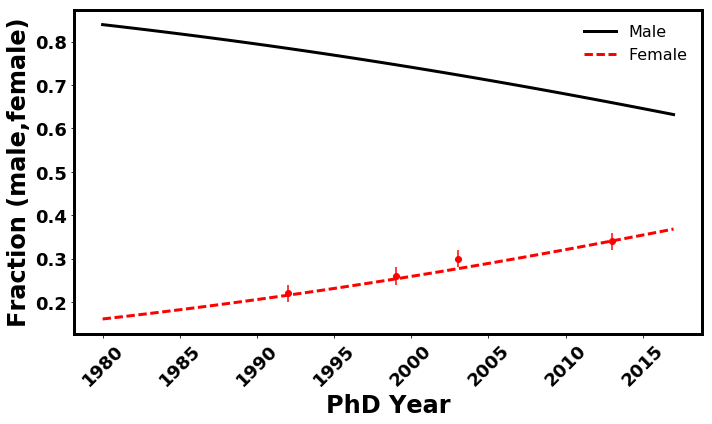

In [17]:
plot_female_increase(.03,year0=2035)
plt.tight_layout()

The figures below show the hiring time for men and women accounting for the changing demographics. Here we show the fraction of male/female astronomers hired in a given year, with the data shown in black and the model shown in red. The relative hiring rates per year have been adjusted to fit the male distribution. 

This model does not recover the distribution of hiring times for women, and instead predicts more women hired at later times. It also slightly overpredicts the fraction of female assistant professors in 2013 (29% for the model vs 26% from the data). This indicates that changing demographics within the field are not the source of the different hiring time distributions.

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.29


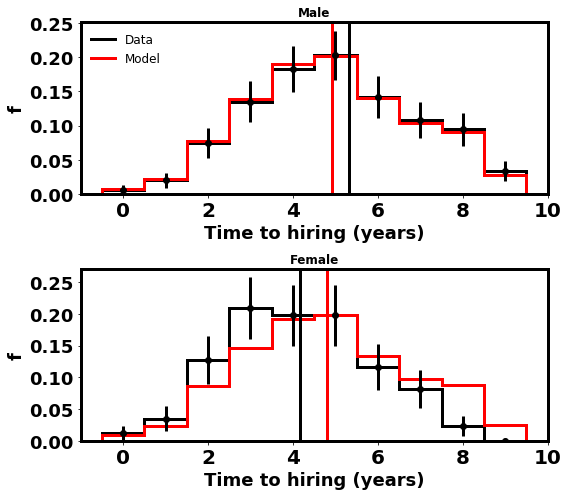

In [18]:
plt.rcParams['figure.figsize']=(8,7)
gendered_model1([.02,.06,.21,.38,.54,.61,.45,.36,.32,.11],slope=.03,year0=2035)
plt.tight_layout()

## Model 2: Hiring Bias

Our second model considers an intrinsic bias towards hiring women. This may occur as a result of diversity efforts leading more universities to hire women more quickly out of graduate school, or because women are intrinsically better qualified for faculty jobs and therefore are more successful on the job market. Given the finite number of women that receive a PhD each year, by removing women from the labor pool early on there are fewer women at later times, shifting the peak of hiring distribution towards shorter timescales.
    
We model this by including a *bias* parameter that is the multiplicative increase in the probability of hiring a women relative to hiring a man (e.g *bias*=2 indicates that women are twice as likely to be hired as men). 

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.70


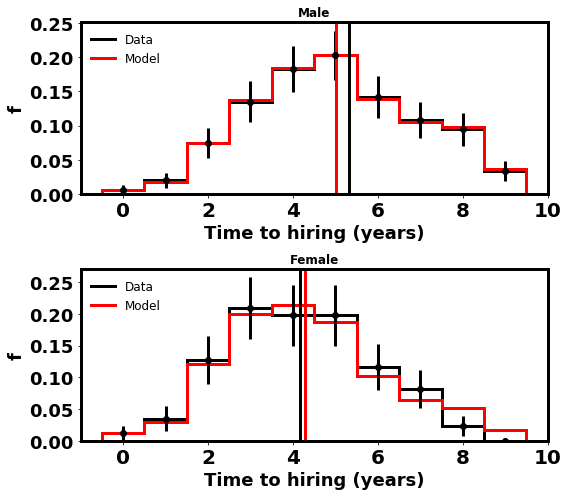

In [19]:
gendered_model2([.02,.05,.21,.4,.55,.63,.45,.34,.32,.12],bias=10)
plt.tight_layout()

An extreme bias (10x higher probability of hiring a women than hiring a man) is needed to approximatly reproduce the hiring time distribution for women. This clearly contradicts the fraction of female assistant professors, over-predicting the 2013 value by a factor of 2. 

The need for a strong bias in this scenario is likely because the number of PhDs outnumbers the number of tenure trck faculty jobs, and it takes a strong bias to substantially deplete the female labor pool. While the number of astronomers that enter the labor pool each year (30,000) and the number that are hired (10,000) with our model is much, much larger than the actual statistics, the relative proportion is realistic. According to the AIP, ~150 astronomers received PhDs per year between 2007 and 2012 (Mulvey & Nicholson 2012), while there are typically ~50 faculty job postings per year. By maintaining this proportion, but vastly increasing the number of people in the labor pool, we can accuratly characterize the model distribution with small sampling errors. 

A much more labor-starved market can reproduce the male/female hiring time distributions (shown below) with a more modest bias towards women. Here we consider 25000 astronomers hired each year into tenure track faculty jobs, with a 2x higher probablity of a female candidate being hired than a male candidate. While this can reproduce the female hiring time distribution, it would require that there are ~125 tenure track faculty positions in astronomy each year, which is certainly not true. This model also still over-predicts the fraction of female assistant professors in 2013.

%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.34


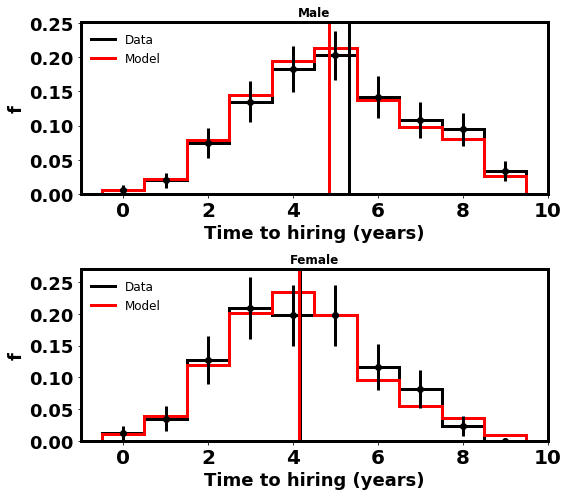

In [20]:
gendered_model2([.01,.04,.14,.28,.45,.63,.53,.48,.5,.19],bias=2,Nhire=25000)
plt.tight_layout()

## Model 3: Leaving the Labor Pool

The third model we consider is one in which astronomers leave the labor pool at a rate that increases with time. As is obvious to anyone that has gone through the process, applying to faculty jobs year after year can become demoralizing,  which can drive people away from faculty jobs. Some of the astronomers that leave the faculty labor market leave the field entirely, while some of them head into non-academic jobs, either at national research institutions (STSCI, etc), or outside of the field of astronomy. If women leave the labor market at a higher rate than men do, then this would starve the long timescale end of the distribution, leading to a sharper turnover in the distribution for women.

The probability of leaving is specified by an exponential with a characteristic timescale *$\tau$* (*p_{leave}$ = 1-exp(time-2)/$\tau$*), where *time* is the numbers of years since receiving a PhD. A smaller timescale implies that the probability of being removed from the labor market increases more quickly with time since PhD. We assume that the timescale differs between male and female astronomers, with shorter timescale (e.g. more rapid departure from the labor market) for women. This departure from the labor market is assumed that only start 2 years after receiving a PhD. Based on this probability, astronomers are removed from the labor market and are not available to be hired. The increasing probability of leaving the labor market at later times depresses the long time tail of the distribution, similar to what is observed among women. 


%Female 2003 grad students (30pm2%): 0.30
%Female Assistant Prof 2013 (26pm4%): 0.20


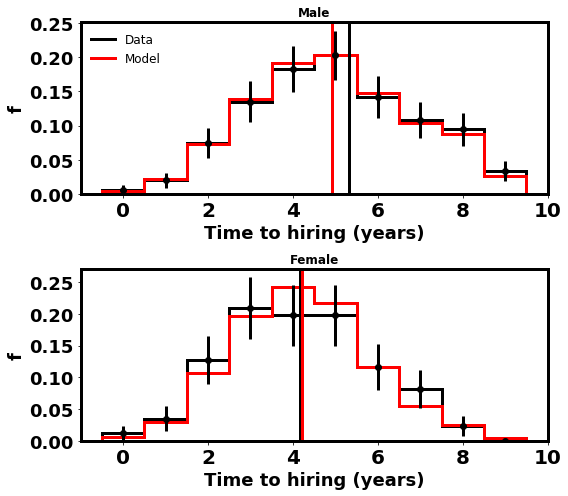

In [23]:
gendered_model3([.01,.05,.18,.36,.55,.72,.67,.65,.8,.4],tau_male=40.,tau_female=9.)
plt.tight_layout()

This model provides a reasonable match to the female hiring time distribution, but slightly under-predicts the fraction of female assistant professors in 2013. 

Within this model women leave the field at a rate that is roughly ~3.5 higher than that of men (shown below). We caution that this model is not unique, nor is it likely to be the best fit. It is merely illustrative of one type of change in the labor market that is consistent with the data.

<string>:1026: RuntimeWarning: invalid value encountered in divide


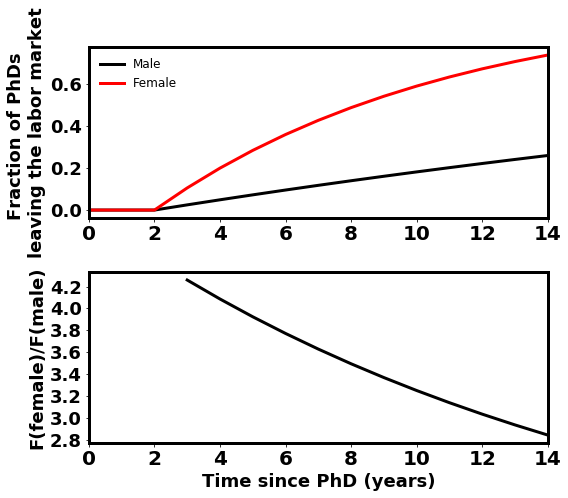

In [24]:
plot_df(40.,9.)
plt.tight_layout()

## Changing Demographics + Leaving the Labor Market

Given the relative success of the previous model, we consider a modified version that includes the increase in the fraction of female PhDs with time...

## Changing hiring probability with time since PhD

The above model considers what happens if women leave the labor market more quickly than men. Another possibility is that there is a bias against hiring women the longer they have been on the labor market...

## Conclusions

We find that substantial differences exist between male and female astronomers. Men, on average, take a year longer than women to transition from being a graduate student to a faculty position. This difference is not due to changing demographics, or a bias towards hiring women, but is consistent with women leaving the labor market at a rate that is 3.5 times higher than men. This depletion in the labor market at late times will bias the time to hiring for women towards faster transitions.

Joining a faculty position is simply one possible career path for PhD astronomers, and while it is the focus of this analysis, we do not mean to imply that the academic career path is the best possible career path. 

### References

- Hughes et al. 2014: Jan 2014 STATUS Newsletter, https://cswa.aas.org/status/Status_2014_Jan.pdf, ed: N. Morrison
- Mulvey & Nicholson 2014: AIP https://www.aip.org/sites/default/files/statistics/undergrad/enrolldegrees-a-12.3.pdf